# 2D trend

This notebook illustrates visually a data set that presents a strong deterministic trend.

The artic topography data set used here is extracted from the data-set that you can find  at the following link [https://zenodo.org/records/5083715](https://zenodo.org/records/5083715).

First of all, import the required modules.

In [1]:
import numpy as np
import matplotlib.pylab as pl
import gstools as gs 

## Load the data-set, define the grid coordinates and plot it

Then, load the file containing the data and set the coordinates of the data set. In the true data set the square cells have a size of 500 m. Here for the sake of simplicity we will take 1 m side cells, in a square image of size $200{\times}200$.

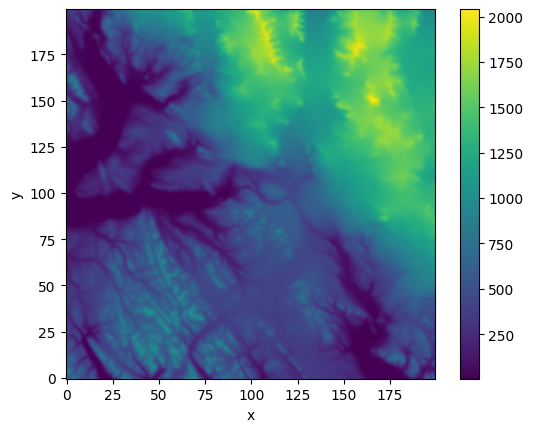

In [2]:
# Load the data-set
data = np.loadtxt("artic108.txt")

# Define grid coordinates
x = np.arange(200)
y = np.arange(200)

# Plot input data
pl.imshow(data, origin="lower")
pl.xlabel("x")
pl.ylabel("y")
pl.colorbar()
pl.show()

## Experimental variogram along two perpendicular directions

The experimental variogram can be computed along two main directions of anysotropy, which are already visible with a good approximation from the previous map. We choose to plot the directions $\pi/4$ and $-\pi/4$.

In [3]:
# Define the bins to compute the variogram
bins = np.arange(0,100,2)

# Define some direction along which compute the variogram
# (the variable `ang_txt` is useful only for plotting purposes, and provides
#  the labels to each directional variogram.)
ang = [-np.pi/4, np.pi/4]
ang_txt = ["-$\\pi/4$", "$\\pi/4$"]

# Compute the experimental variogram
bin_center, gamma = gs.vario_estimate((x, y), data, bins, sampling_size=6000, 
                                      mesh_type="structured", angles=ang,
                                      bandwidth=4, angles_tol=np.pi/12)

## Plot the experimental variogram

We also plot the variance, computed with `np.var` on the valid data only.

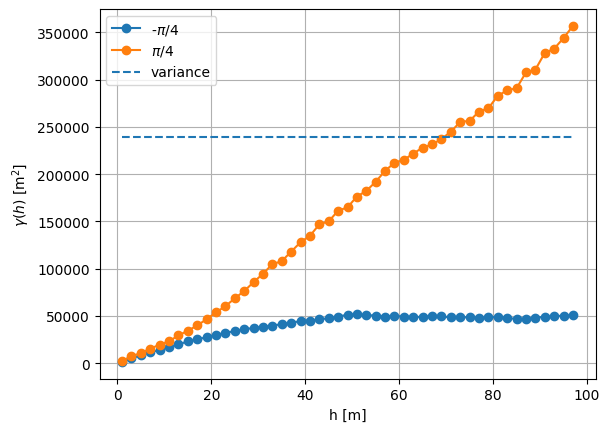

In [4]:
# Loop on all the available directions
for i, a in enumerate(ang):
    pl.plot(bin_center, gamma[i,:], "-o", label=ang_txt[i])

# Compute variance
var = np.var(data[~np.isnan(data)])
pl.hlines(var, xmin=bin_center[0], xmax=bin_center[-1], ls="--", label="variance")
pl.legend()
pl.grid()
pl.xlabel("h [m]")
pl.ylabel("$\gamma(h)$ [m$^2$]")
pl.show()
